<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/Bubble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount Drive

In [32]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


#2. 한글패치

In [33]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rc('font', family='NanumBarunGothic')

#3. Load & Select Data

In [3]:
file = ('/gdrive/MyDrive/data/data_2020.csv')
data = pd.read_csv(file)

In [4]:
data_6_22 = data[data['집계시'].isin(range(6,23))]
data_6_22

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
10,20200101,10,101,105,686,2
11,20200101,10,101,105,761,2
12,20200101,10,101,105,704,2
13,20200101,10,101,105,807,2
14,20200101,10,101,105,687,2
...,...,...,...,...,...,...
37348,20200331,6,101,115,6938,1
37349,20200331,17,101,135,12477,1
37351,20200331,10,101,105,885,1
37352,20200331,8,101,140,13403,1


In [6]:
data_6_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [7]:
data_6_22_count = data_6_22['집계시'].value_counts()
data_6_22_count

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [8]:
data_6_22_count_sorted = data_6_22_count.sort_index()
data_6_22_count_sorted

6     1440
7     1585
8     1662
9     1703
10    1725
11    1744
12    1758
13    1754
14    1766
15    1755
16    1724
17    1719
18    1666
19    1628
20    1611
21    1559
22    1505
Name: 집계시, dtype: int64

In [10]:
data_6_22_time = data_6_22['통행시간']
data_6_22_time

10         686
11         761
12         704
13         807
14         687
         ...  
37348     6938
37349    12477
37351      885
37352    13403
37354     3598
Name: 통행시간, Length: 28304, dtype: int64

In [ ]:
# Configure figure size
plt.figure(figsize=(20,10))
plt.scatter(data_6_22_time.index, data_6_22_time.values, c="g", alpha = 0.5)
plt.title("순번 기준 통행시간",fontsize = 18)
plt.xlabel('순번',fontdict={'size':16})
plt.ylabel('통행시간',fontdict={'size':16})
plt.show()

#4. Bubble

In [11]:
x = data_6_22_count_sorted.index

In [13]:
x =[str(i)+'시' for i in x]

In [14]:
y = data_6_22_count_sorted.values

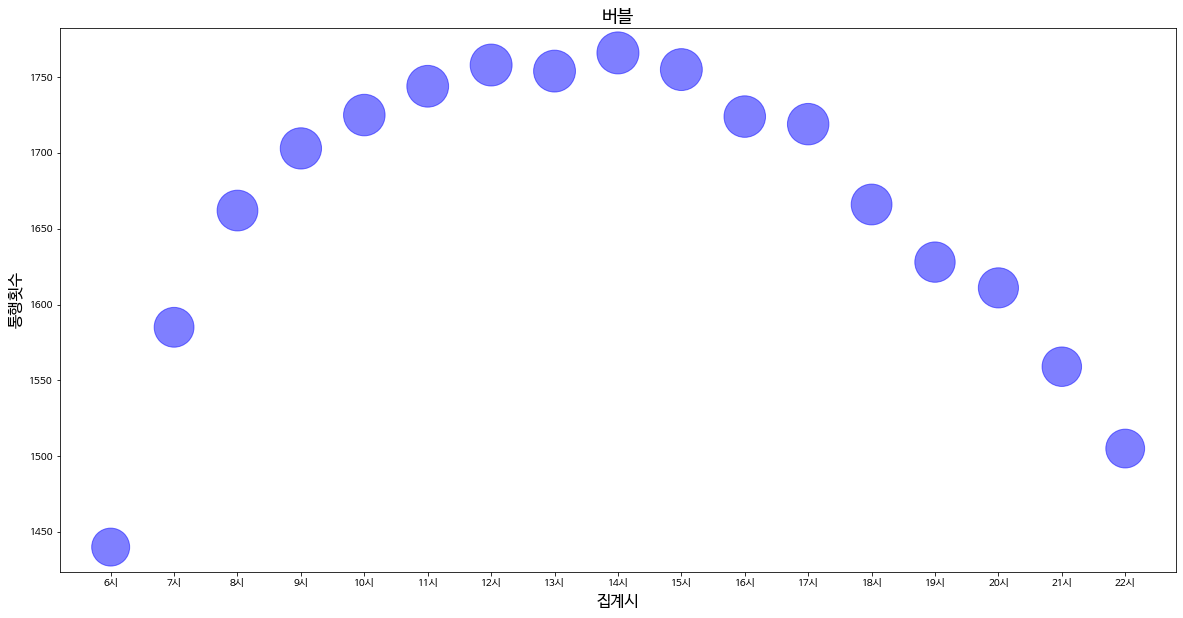

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(x, y, s= y, c='b', alpha =0.5)
plt.title('버블', fontsize = 18)
plt.xlabel('집계시',fontdict={'size':16})
plt.ylabel('통행횟수',fontdict={'size':16})
plt.show()

#4-1 도착영업소코드

In [17]:
data_dest_count =data['도착영업소코드'].value_counts()

In [21]:
data_dest_count_sorted = data_dest_count.sort_index()

In [26]:
x = data_dest_count_sorted.index
x = [str(i) for i in x]
x = ['기흥','목천','대전', '황간','남구미', '동김천', '경주','부산']
x

['기흥', '목천', '대전', '황간', '남구미', '동김천', '경주', '부산']

In [25]:
y = data_dest_count_sorted.values
y

array([12274,  9419,  6509,  1511,  1677,  1972,  1759,  2235])

Text(0, 0.5, '통행횟수')

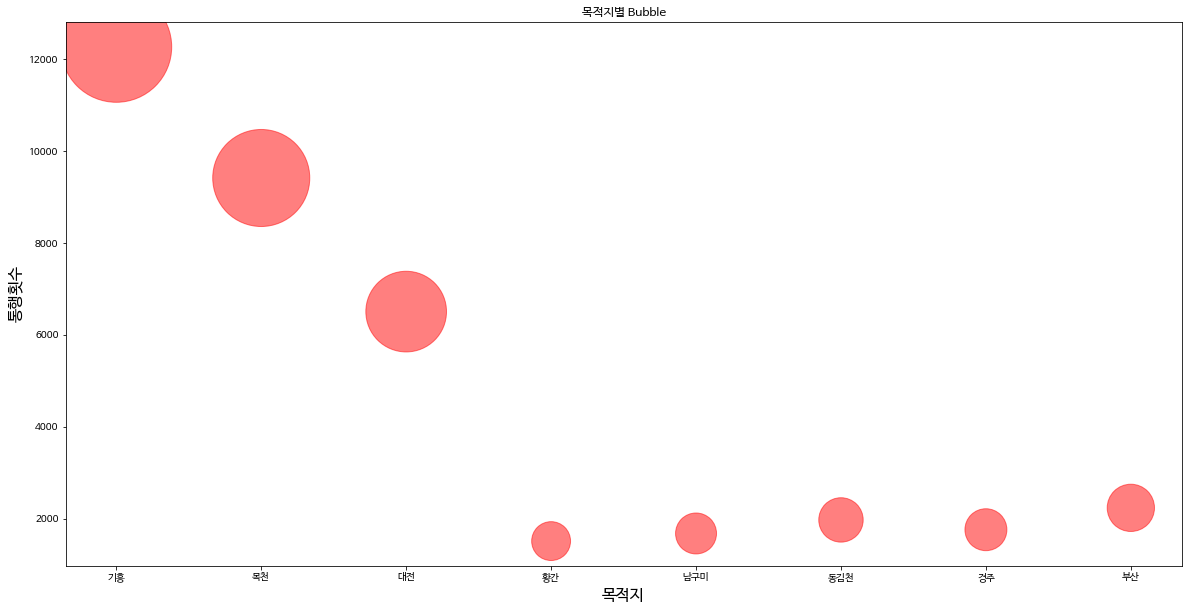

In [28]:
plt.figure(figsize = (20,10))
plt.scatter(x, y , s=y, c='r', alpha=0.5)
plt.title('도착영업소 별 통행횟수 Bubble')
plt.xlabel('목적지', fontdict={'size':16})
plt.ylabel('통행횟수', fontdict={'size':16})

#4-2. 요일별

In [33]:
data_week_mean =  data.groupby(by=['요일']).mean()
data_week_count = data.groupby(by=['요일']).count()

In [43]:
data_week_mean_time = data_week_mean['통행시간']

In [44]:
data_week_count_time = data_week_count['통행시간']

In [45]:
import numpy as np

In [47]:
x = data_week_mean_time.index
y = data_week_mean_time.values
s = data_week_count_time.values
c = np.random.rand(len(data_week_mean_time.index))

Text(0, 0.5, '통행횟수')

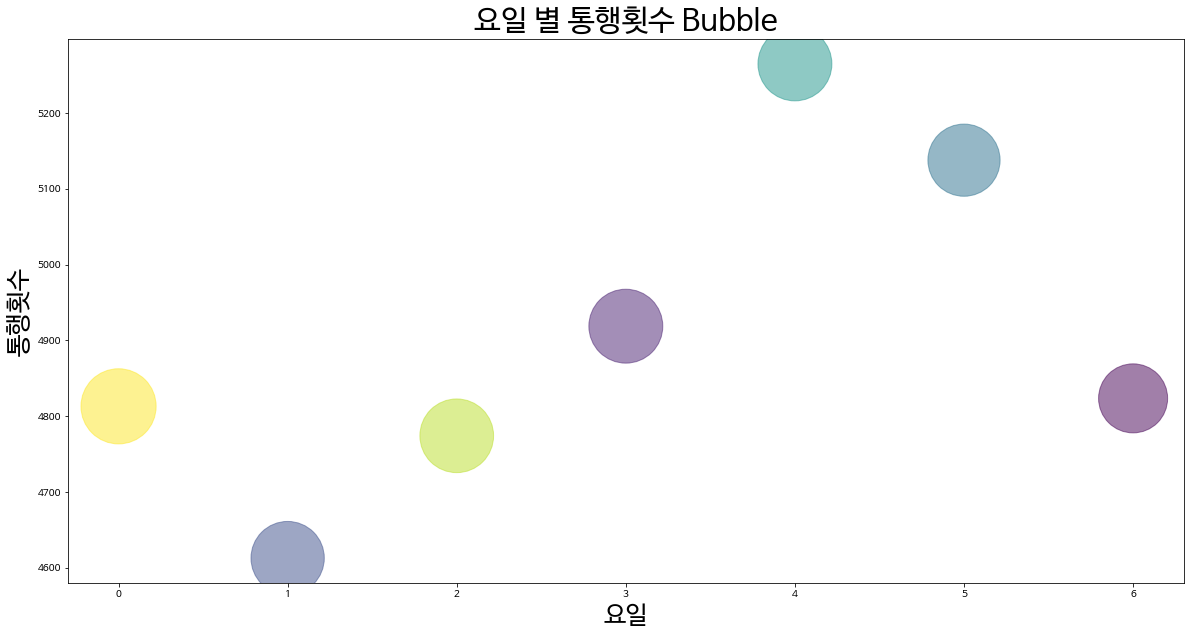

In [50]:
plt.figure(figsize = (20,10))
plt.scatter(x, y , s=s, c=c, alpha=0.5)
plt.title('요일 별 통행횟수 Bubble',fontsize = 30)
plt.xlabel('요일', fontdict={'size':25})
plt.ylabel('통행횟수', fontdict={'size':25})